–í —Ü—å–æ–º—É –¥–æ–º–∞—à–Ω—å–æ–º—É –∑–∞–≤–¥–∞–Ω–Ω—ñ –º–∏ –∑–Ω–æ–≤—É –ø—Ä–∞—Ü—é—î–º–æ –∑ –¥–∞–Ω–∏–º–∏ –∑ –Ω–∞—à–æ–≥–æ –∑–º–∞–≥–∞–Ω–Ω—è ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

–¢—É—Ç –º–∏ –ø–æ–±—É–¥—É—î–º–æ —Ä—ñ—à–µ–Ω–Ω—è –∑–∞–¥–∞—á—ñ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º kNearestNeighboors, –∑–Ω–∞–π–¥–µ–º–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ñ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è —Ü—å–æ–≥–æ –º–µ—Ç–æ–¥—É —ñ –∑—Ä–æ–±–∏–º–æ –±–∞–∑–æ–≤—ñ –∞–Ω—Å–∞–º–±–ª—ñ. –¶–µ –¥–∞—Å—Ç—å –∑–º–æ–≥—É –ø–æ—Ä—ñ–≤–Ω—è—Ç–∏ –ø–µ—Ä—Ñ–æ—Ä–º–∞–Ω—Å –º–æ–¥–µ–ª—ñ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º–∏ –≤–∏–≤—á–µ–Ω–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏.

0. –ó—á–∏—Ç–∞–π—Ç–µ –¥–∞–Ω—ñ `train.csv` —Ç–∞ –∑—Ä–æ–±—ñ—Ç—å –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å–∏–Ω–≥ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ –Ω–∞–ø–∏—Å–∞–Ω–∏–π –í–∞–º–∏ —Å–∫—Ä–∏–ø—Ç `process_bank_churn.py` —Ç–∞–∫, –∞–±–∏ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ –æ—Ç—Ä–∏–º–∞—Ç–∏ –¥–∞–Ω—ñ –≤ —Ä–æ–∑–±–∏—Ç—Ç—ñ X_train, train_targets, X_val, val_targets –¥–ª—è –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤.

  –Ø–∫—â–æ –í–∞–º –Ω–µ –≤–¥–∞–ª–æ—Å—å —Ä–µ–∞–ª—ñ–∑—É–≤–∞—Ç–∏ –≤ –∑–∞–≤–¥–∞–Ω–Ω—ñ `2.3. –î–µ—Ä–µ–≤–∞ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å` —Å–∫—Ä–∏–ø—Ç `process_bank_churn.py` - –º–æ–∂–Ω–∞ —Å–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏—Å—å –≥–æ—Ç–æ–≤–∏–º —Å–∫—Ä–∏–ø—Ç–æ–º –∑ –∑–∞–ø—Ä–æ–ø–æ–Ω–æ–≤–∞–Ω–æ–≥–æ —Ä—ñ—à–µ–Ω–Ω—è —Ç–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è.

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
#pip install mlxtend

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from process_bank_churn import preprocess_data, preprocess_new_data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA


import time
#from sklearn.metrics import classification_report

–í–∏–∫–æ–Ω–∞—î–º–æ –º–∞—à—Ç–∞–±—É–≤–∞–Ω–Ω—è –¥–∞–Ω–∏—Ö, —Ç–∞–∫ —è–∫ –ø—Ä–æ–≤—ñ–≤—à–∏ –¥–µ–∫—ñ–ª—å–∫–∞ –µ–∫—Å–ø–µ—Ä–µ–º–µ–Ω—Ç—ñ–≤ –æ—Ç—Ä–∏–º–∞–ª–∞ –≥—ñ—Ä—à—ñ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –±–µ–∑ –º–∞—à—Ç–∞–±—É–≤–∞–Ω–Ω—è

In [3]:
main_df = pd.read_csv('./bank-customer-churn-prediction-dlu/train.csv', index_col=0)

column_for_drop = ['Surname','CustomerId']
target = 'Exited'
data = preprocess_data(main_df, target, column_for_drop, scaler_numeric=True)
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']

display(X_train)
display(train_targets)

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0        -0.005452  0.034419  1.431840 -0.711819      -1.110115   0.515968   
1         0.796518  0.034419  0.354008 -0.711819       2.630269   0.515968   
2        -0.904212 -0.087489  1.431840  1.669468       0.760077  -1.938103   
3         0.049856  1.741125 -1.442379  1.116976      -1.110115   0.515968   
4        -0.420265  0.156326  0.713285  0.625216       0.760077   0.515968   
...            ...       ...       ...       ...            ...        ...   
11995    -0.973348 -1.062750  1.072563  1.834373      -1.110115   0.515968   
11996    -0.613844 -0.818935 -0.005269  1.739757       0.760077   0.515968   
11997     0.602939 -0.575119 -1.442379  1.252275       0.760077   0.515968   
11998    -0.862731 -0.818935  1.791118  1.368532      -1.110115   0.515968   
11999    -1.623220  0.400141 -0.005269 -0.711819      -1.110115   0.515968   

       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0           -0.979053         0.043440               0.0                0.0   
1           -0.979053         0.899369               1.0                0.0   
2            1.021395         1.289040               0.0                1.0   
3           -0.979053         1.683999               0.0                1.0   
4            1.021395        -0.725591               0.0                1.0   
...               ...              ...               ...                ...   
11995       -0.979053        -0.591402               0.0                0.0   
11996        1.021395        -1.144856               0.0                1.0   
11997       -0.979053         0.365707               0.0                1.0   
11998        1.021395         0.955116               1.0                0.0   
11999       -0.979053         1.138936               1.0                0.0   

       Geography_Spain  Gender_Female  Gender_Male  
0                  1.0            1.0          0.0  
1                  0.0            1.0          0.0  
2                  0.0            1.0          0.0  
3                  0.0            0.0          1.0  
4                  0.0            0.0          1.0  
...                ...            ...          ...  
11995              1.0            0.0          1.0  
11996              0.0            0.0          1.0  
11997              0.0            1.0          0.0  
11998              0.0            0.0          1.0  
11999              0.0            1.0          0.0  

[12000 rows x 13 columns]

id
9839     1.0
9680     0.0
7093     0.0
11293    1.0
820      0.0
        ... 
5191     0.0
13418    0.0
5390     0.0
860      0.0
7270     0.0
Name: Exited, Length: 12000, dtype: float64

1. –ù–∞–≤—á—ñ—Ç—å –Ω–∞ —Ü–∏—Ö –¥–∞–Ω–∏—Ö –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä kNN –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞ –∑–∞–º–æ–≤—á–µ–Ω–Ω—è–º —ñ –≤–∏–º—ñ—Ä—è–π—Ç–µ —Ç–æ—á–Ω—ñ—Å—Ç—å –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É —Ç–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä–∞—Ö. –ó—Ä–æ–±—ñ—Ç—å –∑–∞–∫–ª—é—á–µ–Ω–Ω—è –ø—Ä–æ –æ—Ç—Ä–∏–º–∞–Ω—É –º–æ–¥–µ–ª—å: –≤–æ–Ω–∞ —Ö–æ—Ä–æ—à–∞/–ø–æ–≥–∞–Ω–∞, —á–∏ —î high bias/high variance?

In [18]:
def compute_auroc_and_build_roc(train_targets, train_probs, val_targets, val_probs, name=''):
  
  # Compute ROC curve
  fpr_train, tpr_train, trashold = roc_curve(train_targets, train_probs, pos_label=1.0)
  fpr_val, tpr_val, trashold = roc_curve(val_targets, val_probs, pos_label=1.0)

  # Compute AUROC
  roc_auc_train = auc(fpr_train, tpr_train)
  roc_auc_val = auc(fpr_val, tpr_val)
  print(f'AUROC for Train: {roc_auc_train:.2f}')
  print(f'AUROC for Val: {roc_auc_val:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve Train (area = {roc_auc_train:.2f})')
  plt.plot(fpr_val, tpr_val, color='Blue', lw=2, label=f'ROC curve Val (area = {roc_auc_val:.2f})')

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name} model')
  plt.legend(loc="lower right")
  plt.show()

  return roc_auc_train, roc_auc_val


AUROC for Train: 0.96
AUROC for Val: 0.87


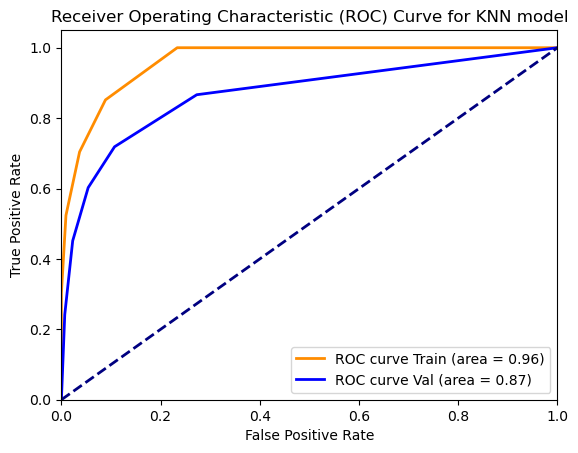

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, train_targets)

train_pred_knn = knn.predict_proba(X_train)[:,1]
val_pred_knn = knn.predict_proba(X_val)[:,1]

train_roc_auc_knn, val_roc_auc_knn = compute_auroc_and_build_roc(
    train_targets, train_pred_knn, val_targets, val_pred_knn, 'KNN'
    )

–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—É—î –≤–∏—â—É —Ç–æ—á–Ω—ñ—Å—Ç—å –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏–º, —â–æ –≤–∫–∞–∑—É—î –Ω–∞ –ø–µ—Ä–µ–Ω–∞–≤—á–∞–Ω–Ω—è. –ú–æ–¥–µ–ª—å –¥–æ–±—Ä–µ –ø—Ä–∞—Ü—é—î –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö, –∞–ª–µ –Ω–µ —Ç–∞–∫ —á—ñ—Ç–∫–æ –æ–ø—Ä–∞—Ü—å–æ–≤—É—î –Ω–æ–≤—ñ –¥–∞–Ω—ñ - High Variance

—Å–ø—Ä–æ–±—É—é –∑–≤–µ—Å—Ç–∏ –¥–æ –¥–≤–æ–≤–∏–º—ñ—Ä–Ω–æ–≥–æ –º–∞—Å–∏–≤—É —ñ –∑–≤—ñ–∑—É–∞–ª—ñ–∑—É–≤–∞—Ç–∏ –¥–∞–Ω—ñ 

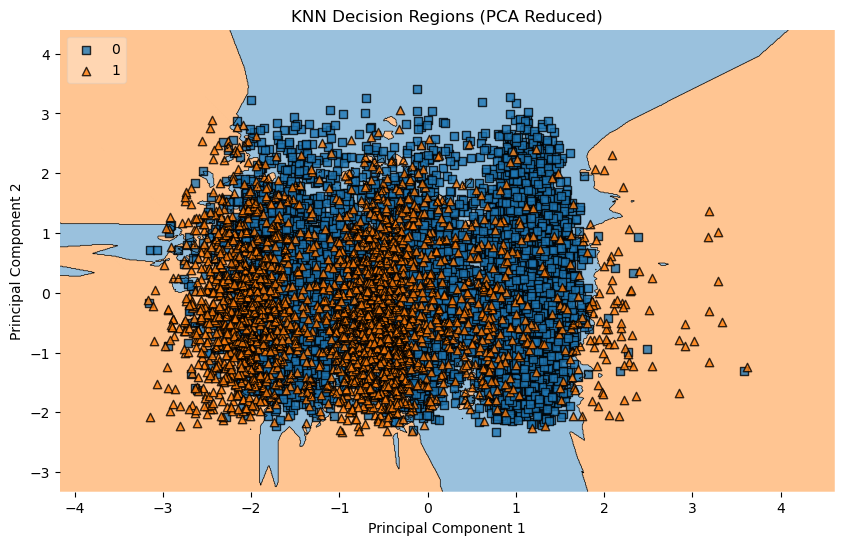

In [23]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# –ù–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ KNN
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, train_targets)

# –ü–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è –π–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç–µ–π –¥–ª—è —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö —Ç–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö
train_pred_knn_pca = knn_pca.predict_proba(X_train_pca)[:, 1]
val_pred_knn_pca = knn_pca.predict_proba(X_val_pca)[:, 1]

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –æ–±–ª–∞—Å—Ç–µ–π —Ä—ñ—à–µ–Ω—å –¥–ª—è KNN –ø—ñ—Å–ª—è PCA
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_pca, train_targets.values.astype(np.int_), clf=knn_pca, legend=2)
plt.title("KNN Decision Regions (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

2. –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ `GridSearchCV` –∑–Ω–∞–π–¥—ñ—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `n_neighbors` –¥–ª—è –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞ `kNN`. –ü—Å–æ—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å –≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 5 —Ñ–æ–ª–¥—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â–µ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `knn_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `GridSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `knn_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Å—Ç–∞–ª–∞ –≤–æ–Ω–∞ –∫—Ä–∞—â–µ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º –ø—É–∫–Ω—Ç–æ–º (2) —Ü—å–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è? –ß–∏ —î –≤–æ–Ω–∞ –∫—Ä–∞—â–µ –∑–∞ –¥–µ—Ä–µ–≤–æ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –î–ó?

–ù–∞–π–∫—Ä–∞—â–µ –∑–Ω–∞—á–µ–Ω–Ω—è n_neighbors: 21
AUROC for Train: 0.94
AUROC for Val: 0.91


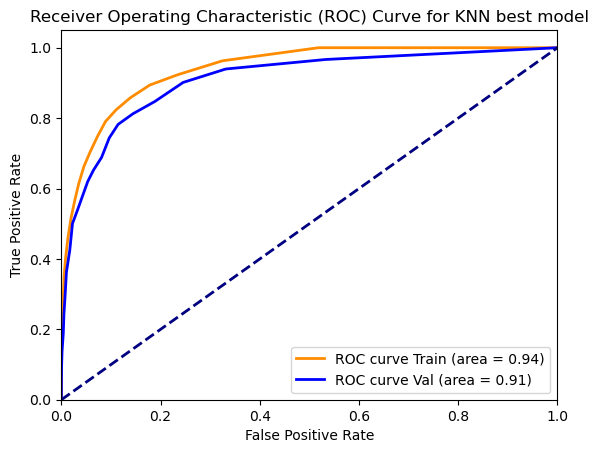

In [26]:
knn_adj = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 30)}

grid_search = GridSearchCV(knn_adj, param_grid, cv=5,)
grid_search.fit(X_train, train_targets)

# –û—Ç—Ä–∏–º—É—î–º–æ –Ω–∞–π–∫—Ä–∞—â—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ —Ç–∞ –º–æ–¥–µ–ª—å
best_params_knn_adj = grid_search.best_params_
knn_best = grid_search.best_estimator_

print('–ù–∞–π–∫—Ä–∞—â–µ –∑–Ω–∞—á–µ–Ω–Ω—è n_neighbors:', best_params_knn_adj['n_neighbors'])

# –û—Ü—ñ–Ω–∫–∞ —è–∫–æ—Å—Ç—ñ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä–∫–∞—Ö
train_pred_knn_adj = knn_best.predict_proba(X_train)[:, 1]
val_pred_knn_adj = knn_best.predict_proba(X_val)[:, 1]

train_roc_auc_knn_adj, val_roc_auc_knn_adj = compute_auroc_and_build_roc(
    train_targets, train_pred_knn_adj, val_targets, val_pred_knn_adj, 'KNN best'
    )

–ú–æ–∂–Ω–∞ –≤–≤–∞–∂–∞—Ç–∏, —â–æ –Ω–æ–≤–∞ –º–æ–¥–µ–ª—å –∫—Ä–∞—â–∞, —Ç–∞–∫ —è–∫ –º–∞—î –≤–∏—â—É AUROC –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—é—é –º–æ–¥–µ–ª—é, –º–æ–∂–ª–∏–≤–æ –Ω–µ–æ–±—Ö—ñ–¥–Ω–æ —Å–ø—Ä–æ–±—É–≤–∞—Ç–∏ —â–µ –¥–æ–¥–∞—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è –ø–æ–∫—Ä–∞—â–µ–Ω–Ω—è –º–æ–¥–µ–ª—ñ.

In [28]:
# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
train_roc_auc_decision_tree = 0.94
val_roc_auc_decision_tree = 0.92

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö
print("–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö:")
print(f"Decision Tree Train ROC AUC: {train_roc_auc_decision_tree:.2f}")
print(f"–ü–æ–ø–µ—Ä–µ–¥–Ω—ñ–π kNN Train ROC AUC: {train_roc_auc_knn:.2f}")
print(f"–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π kNN Train ROC AUC: {train_roc_auc_knn_adj:.2f}")

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö
print("\n–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö:")
print(f"Decision Tree Validation ROC AUC: {val_roc_auc_decision_tree:.2f}")
print(f"–ü–æ–ø–µ—Ä–µ–¥–Ω—ñ–π kNN Validation ROC AUC: {val_roc_auc_knn:.2f}")
print(f"–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π kNN Validation ROC AUC: {val_roc_auc_knn_adj:.2f}")


–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö:
Decision Tree Train ROC AUC: 0.94
–ü–æ–ø–µ—Ä–µ–¥–Ω—ñ–π kNN Train ROC AUC: 0.96
–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π kNN Train ROC AUC: 0.94

–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö:
Decision Tree Validation ROC AUC: 0.92
–ü–æ–ø–µ—Ä–µ–¥–Ω—ñ–π kNN Validation ROC AUC: 0.87
–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π kNN Validation ROC AUC: 0.91


–ù–∞ –¥–∞–Ω–æ–º—É –µ—Ç–∞–ø—ñ –º–∞—î–º–æ –Ω–∞–π–∫—Ä–∞—â—ñ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –º–æ–¥–µ–ª—ñ –¥–µ—Ä–µ–≤ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω–Ω—è –Ω–∞–ª–∞—à—Ç–æ–≤–∞–Ω–æ—ó –≤ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–º—É –∑–∞–≤–¥–∞–Ω–Ω—ñ, –ø–æ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞ –∑–∞–º–æ–≤—á–µ–Ω–Ω—è–º –º–∞—î–º–æ –ø–µ—Ä–µ–Ω–∞–≤—á–µ–Ω—É –º–æ–¥–µ–ª—å —ñ –æ—Ç—Ä–∏–º–∞–ª–∏ –Ω–µ–ø–æ–≥–∞–Ω—ñ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –ø—ñ—Å–ª—è –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ 

3. –í–∏–∫–æ–Ω–∞–π—Ç–µ –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è `DecisionTreeClassifier` –∑ `GridSearchCV` –∑–∞ —Å—ñ—Ç–∫–æ—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
  - `max_depth` –≤—ñ–¥ 1 –¥–æ 20 –∑ –∫—Ä–æ–∫–æ–º 2
  - `max_leaf_nodes` –≤—ñ–¥ 2 –¥–æ 10 –∑ –∫—Ä–æ–∫–æ–º 1

  –û–±–æ–≤ º—è–∑–∫–æ–≤–æ –ø—Ä–∏ —Ü—å–æ–º—É —ñ–Ω—ñ—Ü—ñ—é–π—Ç–µ –º–æ–¥–µ–ª—å –∑ —Ñ—ñ–∫—Å–∞—Ü—ñ—î—é `random_seed`.

  –ü–æ—Å—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å–≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 3 —Ñ–æ–ª–¥–∏, `scoring='roc_auc'`, —Ç–∞ –≤–∏–º—ñ—Ä—è–π—Ç–µ, —Å–∫—ñ–ª—å–∫–∏ —á–∞—Å—É –ø–æ—Ç—Ä–µ–±—É—î –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `dt_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `GridSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `dt_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Ü—è –º–æ–¥–µ–ª—å –∫—Ä–∞—â–∞ –∑–∞ —Ç—É, —â–æ –≤–∏ –∑–Ω–∞–π—à–ª–∏ –≤—Ä—É—á–Ω—É?

–ß–∞—Å –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤: 3.5641019344329834
–ù–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤: {'max_depth': 5, 'min_samples_leaf': 8}
AUROC for Train: 0.93
AUROC for Val: 0.91


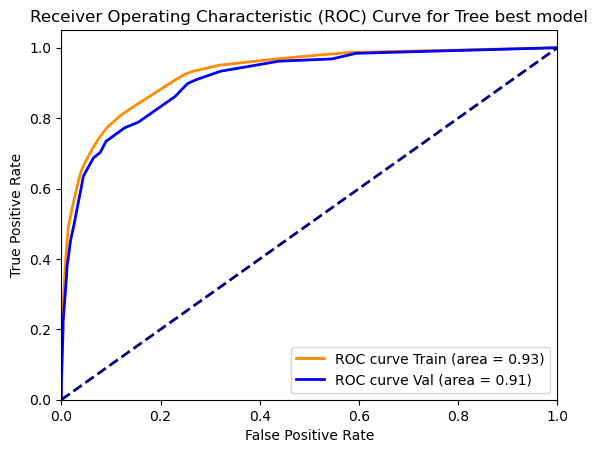

In [32]:
# –ù–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è GridSearchCV
param_model = {
    'max_depth': range(1, 21, 2),
    #'max_leaf_nodes': range(2, 11)
    'min_samples_leaf': range(2, 11)
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt, param_model, cv=3, scoring='roc_auc')
start_time = time.time()
grid_search.fit(X_train, train_targets)
end_time = time.time()

search_time = end_time - start_time

best_param_dt = grid_search.best_params_
best_dt = grid_search.best_estimator_

print("–ß–∞—Å –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤:", search_time)
print("–ù–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤:", best_param_dt)

train_pred_df_best = best_dt.predict_proba(X_train)[:, 1]
y_val_pred_dt_best = best_dt.predict_proba(X_val)[:, 1]

train_roc_auc_dt_best, val_roc_auc_dt_best= compute_auroc_and_build_roc(
    train_targets, train_pred_df_best, val_targets, y_val_pred_dt_best, 'Tree best'
    )


In [33]:
# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö
print("–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö:")
print(f"Decision Tree Train ROC AUC: {train_roc_auc_decision_tree:.2f}")
print(f"–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π Decision Tree Train ROC AUC: {train_roc_auc_dt_best:.2f}")

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö
print("\n–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö:")
print(f"Decision Tree Validation ROC AUC: {val_roc_auc_decision_tree:.2f}")
print(f"–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π Decision Tree Validation ROC AUC: {val_roc_auc_dt_best:.2f}")

–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö:
Decision Tree Train ROC AUC: 0.94
–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π Decision Tree Train ROC AUC: 0.93

–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö:
Decision Tree Validation ROC AUC: 0.92
–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π Decision Tree Validation ROC AUC: 0.91


(–ü—ñ–¥—ñ–±—Ä–∞–ª–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏? —è–∫—ñ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞–ª–∞ –≤ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–π –º–æ–¥–µ–ª—ñ)
–ú–æ–¥–µ–ª—å –Ω–µ –ø–æ–∫–∞–∑–∞–ª–∞ –∫—Ä–∞—â—ñ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –Ω—ñ–∂ –ø—ñ–¥—ñ–±—Ä–∞–Ω—ñ –≤—Ä—É—á–Ω—É, –∞–ª–µ —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å –¥–æ–≤–æ–ª—ñ –¥–æ–±—Ä–µ, —â–æ –æ–ø—Ç–∏–º—ñ–∑—É—î –ø—Ä–æ—Ü–µ—Å —Ä–æ–±–æ—Ç–∏ –≤ —Ü—ñ–ª–æ–º—É, –∞–ª–µ –¥–ª—è —è–∫—ñ—Å–Ω—ñ—à–æ–≥–æ –Ω–∞–≤—á–∞–Ω–Ω—è —è –± –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞–ª–∞ —Ü–µ–π –º–µ—Ç–æ–¥ —è–∫ –æ—Ä—ñ—î–Ω—Ç–∏—Ä–∏—Ä –≤–∏–±–æ—Ä—É –∑–Ω–∞—á–µ–Ω—å –∑ —è–∫–∏–º–∏ –º–æ–∂–Ω–∞ –µ–∫—Å–ø–µ—Ä–µ–º–µ–Ω—Ç—É–≤–∞—Ç–∏.

4. –í–∏–∫–æ–Ω–∞–π—Ç–µ –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è `DecisionTreeClassifier` –∑ `RandomizedSearchCV` –∑–∞ –∑–∞–¥–∞–Ω–æ—é —Å—ñ—Ç–∫–æ—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ —ñ –∫—ñ–ª—å–∫—ñ—Å—Ç—å —ñ—Ç–µ—Ä–∞—Ü—ñ–π 40.

  –ü–æ—Å—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å–≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 3 —Ñ–æ–ª–¥–∏, `scoring='roc_auc'`, –∑–∞—Ñ—ñ–∫—Å—É–π—Ç–µ `random_seed` –ø—Ä–æ—Ü–µ–¥—É—Ä–∏ –∫—Ä–æ—Å –≤–∞–ª—ñ–¥–∞—Ü—ñ—ó —Ç–∞ –≤–∏–º—ñ—Ä—è–π—Ç–µ, —Å–∫—ñ–ª—å–∫–∏ —á–∞—Å—É –ø–æ—Ç—Ä–µ–±—É—î –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `dt_random_search_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `RandomizedSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `dt_random_search_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Ü—è –º–æ–¥–µ–ª—å –∫—Ä–∞—â–∞ –∑–∞ —Ç—É, —â–æ –≤–∏ –∑–Ω–∞–π—à–ª–∏ –∑ `GridSearch`?
    - –ø—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–π—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ `dt_random_search_best` —ñ –ø–æ—Ä—ñ–≤–Ω—è–π—Ç–µ –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ `dt_best` - —è–∫—É –±–∞—á–∏—Ç–µ –≤—ñ–¥–º—ñ–Ω–Ω—ñ—Å—Ç—å? –¶—è –≤–ø—Ä–∞–≤–∞ –ø–æ—Ç—Ä—ñ–±–Ω–∞ –∞–±–∏ –∑—Ä–æ–∑—É–º—ñ—Ç–∏, —è–∫ —Ä—ñ–∑–Ω—ñ –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è `DecisionTreeClassifier` –≤–ø–ª–∏–≤–∞—é—Ç—å –Ω–∞ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ.

–ß–∞—Å –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤: 0.45736193656921387
–ù–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ (RandomizedSearchCV): {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': 14, 'max_features': None, 'max_depth': 16, 'criterion': 'entropy'}
AUROC for Train: 0.92
AUROC for Val: 0.90


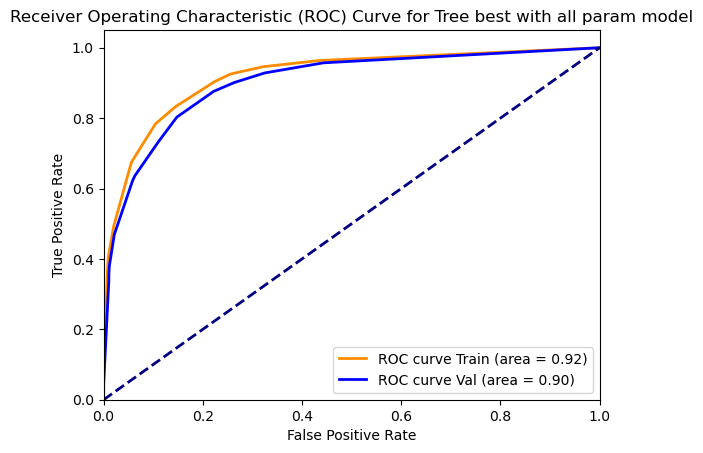

In [34]:
params_model_all = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

dt_all_param = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    dt_all_param, params_model_all, n_iter=40, cv=3, scoring='roc_auc', random_state=42
)

start_time = time.time()
random_search.fit(X_train, train_targets)
end_time = time.time()

search_time = end_time - start_time

# –û—Ç—Ä–∏–º—É—î–º–æ –Ω–∞–π–∫—Ä–∞—â—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ —Ç–∞ –º–æ–¥–µ–ª—å
best_params_dt_random = random_search.best_params_
best_dt_random = random_search.best_estimator_

print("–ß–∞—Å –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤:", search_time)
print("–ù–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ (RandomizedSearchCV):", best_params_dt_random)

train_pred_dt_random = best_dt_random.predict_proba(X_train)[:, 1]
val_pred_dt_random = best_dt_random.predict_proba(X_val)[:, 1]

train_roc_auc_dt_random, val_roc_auc_dt_random = compute_auroc_and_build_roc(
    train_targets, train_pred_dt_random, val_targets, val_pred_dt_random, 'Tree best with all param'
    )


In [36]:
# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö
print("–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö:")
print(f"Decision Tree Train ROC AUC: {train_roc_auc_decision_tree:.2f}")
print(f"–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π Decision Tree Train ROC AUC: {train_roc_auc_dt_best:.2f}")
print(f"–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π –∑ –Ω–∞–π–∫—Ä–∞—â–∏–º–∏ —Ä–∞–Ω–¥–æ–º–Ω–∏—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ Decision Tree Train ROC AUC: {train_roc_auc_dt_random:.2f}")

# –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö
print("\n–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö:")
print(f"Decision Tree Validation ROC AUC: {val_roc_auc_decision_tree:.2f}")
print(f"–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π Decision Tree Validation ROC AUC: {val_roc_auc_dt_best:.2f}")
print(f"–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π –∑ –Ω–∞–π–∫—Ä–∞—â–∏–º–∏ —Ä–∞–Ω–¥–æ–º–Ω–∏—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ Decision Tree Train ROC AUC: {val_roc_auc_dt_random:.2f}")

–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö:
Decision Tree Train ROC AUC: 0.94
–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π Decision Tree Train ROC AUC: 0.93
–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π –∑ –Ω–∞–π–∫—Ä–∞—â–∏–º–∏ —Ä–∞–Ω–¥–æ–º–Ω–∏—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ Decision Tree Train ROC AUC: 0.92

–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö:
Decision Tree Validation ROC AUC: 0.92
–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π Decision Tree Validation ROC AUC: 0.91
–ù–∞–ª–∞—à—Ç–æ–≤–∞–Ω–∏–π –∑ –Ω–∞–π–∫—Ä–∞—â–∏–º–∏ —Ä–∞–Ω–¥–æ–º–Ω–∏—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ Decision Tree Train ROC AUC: 0.90


–ú–æ–¥–µ–ª—å —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å –≥—ñ—Ä—à–µ –∑–∞ –ø–æ–ø–µ—Ä–µ–¥–Ω—é, –≤–∏—Å–Ω–æ–≤–∫–∏ –∞–Ω–∞–ª–æ–≥—ñ—á–Ω—ñ –¥–æ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ—Ö, –¥–æ–±—Ä–µ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ –¥–ª—è –Ω–∞–ø—Ä—è–º–∫—É –≤–∏–±–æ—Ä—É –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤


5. –Ø–∫—â–æ —É –í–∞—Å –≤–∏–π—à–ª–∞ –º–µ—Ç—Ä–∏–∫–∞ `AUROC` –≤ —Ü—ñ–π —Å–µ—Ä—ñ—ó –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤ - –∑—Ä–æ–±—ñ—Ç—å —â–µ –æ–¥–∏–Ω `submission` –Ω–∞ Kaggle —ñ –¥–æ–¥–∞–π—Ç–µ –∫–æ–¥ –¥–ª—è —Ü—å–æ–≥–æ —ñ —Å–∫—Ä—ñ–Ω—à–æ—Ç —Å–∫–æ—Ä–∞ –Ω–∞ –ø—É–±–ª—ñ—á–Ω–æ–º—É –ª—ñ–¥–µ—Ä–±–æ—Ä–¥—ñ –Ω–∏–∂—á–µ.

  –°–ø–æ–¥—ñ–≤–∞—é—Å—å –Ω–∞ —Ü—å–æ–º—É –µ—Ç–∞–ø—ñ –≤–∏ –≤–∂–µ –≤—ñ–¥—á—É–ª–∏ —Å–µ–±–µ —Å–ø—Ä–∞–≤–∂–Ω—ñ–º –¥–æ—Å–ª—ñ–¥–Ω–∏–∫–æ–º üòâ

–ø—Ä–æ–ø—É—Å–∫–∞—é —Ç–∞–∫ —è–∫ –∑–º–∞–≥–∞–Ω–Ω—è –≤–∂–µ –∑–∞–≤–µ—Ä—à–µ–Ω—ñ —ñ –∂–æ–¥–Ω–∞ –∑ –º–æ–¥–µ–ª–µ–π –Ω–µ –ø–æ–∫–∞–∑–∞–ª–∞ –∫—Ä–∞—â–æ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö —Ç–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö, —Ö–æ—á–∞ –±—É–ª–æ –± —Ü—ñ–∫–∞–≤–æ –ø–æ–¥–∏–≤–∏—Ç–∏—Å—å —è–∫ –±–∏ —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–∏—Ö